In [4]:
using Gadfly
using DataFrames

In [5]:
set_default_plot_size(25cm, 15cm)

# Results

Results computed with an extract of 10.000.000 first lines of twitter-words.txt. True values calculated with onePass algorithms.

In [6]:
groud_truth_f0 = 2543534;
groud_truth_f2 = 229783589718; 

## Alon-Matias-Szegedy

In [7]:
ams10 = readtable("triton-results/ams_iterate-ratio/input10000000_numvars10_it5.csv")
ams100 = readtable("triton-results/ams_iterate-ratio/input10000000_numvars100_it5.csv")
ams1000 = readtable("triton-results/ams_iterate-ratio/input10000000_numvars1000_it5.csv")
ams10000 = readtable("triton-results/ams_iterate-ratio/input10000000_numvars10000_it5.csv")
ams100000 = readtable("triton-results/ams_iterate-ratio/input10000000_numvars100000_it5.csv");
ams1000000 = readtable("triton-results/ams_iterate-ratio/input10000000_numvars1000000_it3.csv");

In [8]:
ams = vcat(ams10, ams100, ams1000, ams10000, ams100000, ams1000000)
errors = abs(ams[:Result].-groud_truth_f2)
ams[:Error] = errors;

In [7]:
head(ams, 3)

,Label,InputSize,Result,Time,Space,Variables,Ratio,Error
1,ams,10000000,6.36342e11,8.993938477,1.828532041e9,10,0.1,4.06558410282e11
2,ams,10000000,1.2318e10,11.144765966,1.812297353e9,10,0.1,2.17465589718e11
3,ams,10000000,1.701e10,11.322889497,1.812387145e9,10,0.1,2.12773589718e11


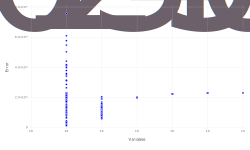

In [9]:
plot(ams, 
layer(y="Error", x="Variables", Geom.point, Theme(default_color=colorant"blue")), 
Scale.x_log10)

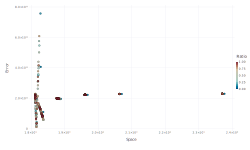

In [9]:
plot(ams, y="Error", x="Space", Geom.point, color="Ratio")

In [10]:
varmax = rename!(by(ams, :Variables, ams -> mean(ams[:Error]) + 1e-11 * var(ams[:Error])), :x1, :Varmax)
varmin = rename!(by(ams, :Variables, ams -> mean(ams[:Error]) - 1e-11 * var(ams[:Error])), :x1, :Varmin);
var_df = rename!(hcat(varmax, varmin[:Varmin]), :x1, :Varmin)

,Variables,Varmax,Varmin
1,10,3.87031021223972e11,4.078641430012158e10
2,100,1.2056726051252512e11,1.0431592046749942e11
3,1000,1.9810968714010846e11,1.980805972787544e11
4,10000,2.224500440162231e11,2.2244992773221744e11
5,100000,2.282159063916168e11,2.282159059142565e11
6,1000000,2.2946751187309607e11,2.2946751186994226e11


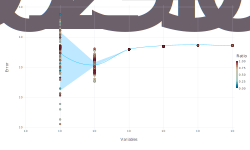

In [11]:
plot(ams, layer(y="Error", x="Variables",  Geom.point, color="Ratio"),
layer(y="Error", x="Variables", Geom.smooth(method=:loess, smoothing=0.8)), 
layer(var_df, x=:Variables, ymin=:Varmin, ymax=:Varmax, Geom.ribbon), 
Scale.x_log10, Scale.y_log10)

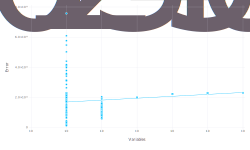

In [12]:
plot(ams, y="Error", x="Variables", Scale.x_log10, Geom.point, Geom.smooth(method=:lm))

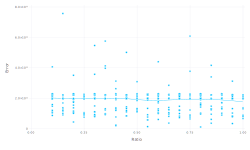

In [13]:
plot(ams, y="Error", x="Ratio", Geom.point, Geom.smooth(method=:loess,smoothing=0.7))

## Flajolet-Martin

In [15]:
fma_murmur_10 = readtable("triton-results/fma_murmur3_iterate-ratio/input10000000_numvars10_it5.csv")
fma_murmur_100 = readtable("triton-results/fma_murmur3_iterate-ratio/input10000000_numvars100_it5.csv");
fma_murmur_1000 = readtable("triton-results/fma_murmur3_iterate-ratio/input10000000_numvars1000_it5.csv");
fma_murmur_10000 = readtable("triton-results/fma_murmur3_iterate-ratio/input10000000_numvars10000_it3.csv");

In [14]:
fma_fnv_10 = readtable("triton-results/fma_fnv_iterate-ratio/input10000000_numvars10_it5.csv")
fma_fnv_100 = readtable("triton-results/fma_fnv_iterate-ratio/input10000000_numvars100_it5.csv");
fma_fnv_1000 = readtable("triton-results/fma_fnv_iterate-ratio/input10000000_numvars1000_it5.csv");

In [17]:
fma_poly_10 = readtable("triton-results/fma_poly_iterate-ratio/input10000000_numvars10_it2.csv")
fma_poly_100 = readtable("triton-results/fma_poly_iterate-ratio/input10000000_numvars100_it2.csv")
fma_poly_1000 = readtable("triton-results/fma_poly_iterate-ratio/input10000000_numvars1000_it2.csv");

In [39]:
fma = vcat(fma_murmur_10, fma_murmur_100, fma_murmur_1000, fma_fnv_10, fma_fnv_100, 
    fma_fnv_1000, fma_poly_10, fma_poly_100, fma_poly_1000)
errors = abs(fma[:Result].-groud_truth_f0)
fma[:Error] = errors;

In [38]:
head(fma, 1)

,Label,InputSize,Result,Time,Space,Hashes,Ratio,Error
1,fma_murmur3,10000000,3.24433608704e6,6.051950234,2.618838909e9,10,0.1,700802.0870400001


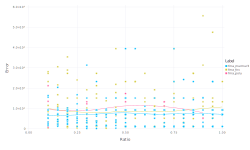

In [21]:
plot(fma, y="Error", x="Ratio", Geom.point, color="Label", Geom.smooth(method=:loess,smoothing=0.7))

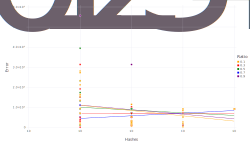

 in depwarn at deprecated.jl:73
 in color at /Users/cwestrup/.julia/v0.4/Colors/src/parse.jl:145
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/cwestrup/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/cwestrup/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[22], in expression starting on line 1
 in depwarn at deprecated.jl:73
 in color at /Users/cwestrup/.julia/v0.4/Colors/src/parse.jl:145
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /Users/cwestrup/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /Users/cwestrup/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading In[22], in expression starting on line 1


In [22]:
plot(
layer(fma[fma[:Ratio] .== 0.1, :], x="Hashes", y="Error", Geom.point, Geom.smooth(method=:lm,smoothing=0.7),
Theme(default_color=color("orange"))),
layer(fma[fma[:Ratio] .== 0.3, :], x="Hashes", y="Error", Geom.point, Geom.smooth(method=:lm,smoothing=0.7),
Theme(default_color=color("red"))),
layer(fma[fma[:Ratio] .== 0.5, :], x="Hashes", y="Error", Geom.point, Geom.smooth(method=:lm,smoothing=0.7),
Theme(default_color=color("green"))),
layer(fma[fma[:Ratio] .== 0.7, :], x="Hashes", y="Error", Geom.point, Geom.smooth(method=:lm,smoothing=0.7),
Theme(default_color=color("blue"))),
layer(fma[fma[:Ratio] .== 0.9, :], x="Hashes", y="Error", Geom.point, Geom.smooth(method=:lm,smoothing=0.7),
Theme(default_color=color("purple"))),
Guide.manual_color_key("Ratio",["0.1", "0.3", "0.5", "0.7", "0.9"], 
["orange", "red", "green", "blue", "purple"]),
Scale.x_log10)

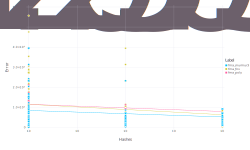

In [40]:
plot(fma, x="Hashes", y="Error", Geom.point, Theme(default_color=colorant"red"),
Geom.smooth(method=:lm), Scale.x_log10, color="Label")

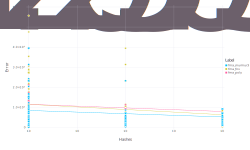

In [42]:
plot(fma, layer(y="Error", x="Hashes",  Geom.point, color="Label", Geom.smooth(method=:lm)), 
Scale.x_log10)